## Supervised Classification


In [63]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import catboost as cat 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.


In [2]:
data = pd.read_csv('./data_all.csv')

In [3]:
data.head(10)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [5]:
array_data = np.array(data)
array_data

array([[36.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 3.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [28.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 5.,  0.,  0., ...,  0.,  0.,  0.]])

In [6]:
array_data.shape

(116322, 785)

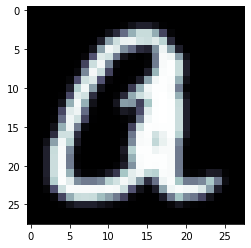

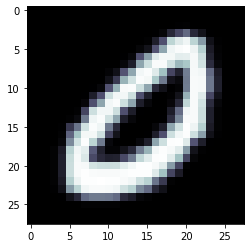

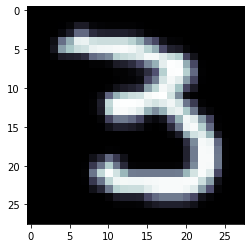

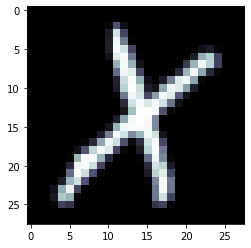

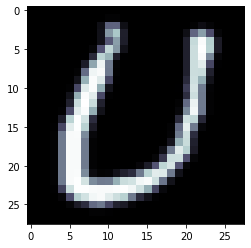

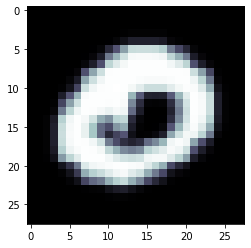

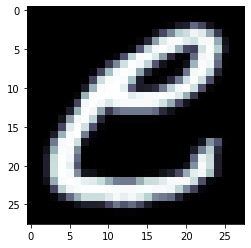

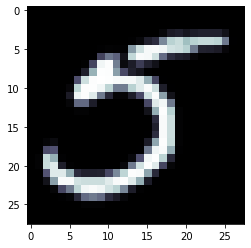

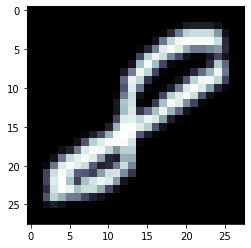

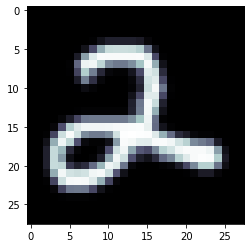

In [7]:
for i in range(10):
    fig, ax = plt.subplots()
    ax.imshow(array_data[i, 1:].reshape(28, 28), cmap=plt.cm.bone, interpolation='nearest');

In [8]:
## Column 'e':

    # 0-9: numbers
    # 10-35: uppercases
    # 36-61: lowercases

Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [11]:
data['is_number'] = np.where((data['e'] >= 0) & (data['e'] <= 9), 1 , 0)
data['is_uppercase'] = np.where((data['e'] >= 10) & (data['e'] <= 35), 1, 0)
data['is_lowercase'] = np.where((data['e'] >= 36) & (data['e'] <= 61), 1, 0)

In [12]:
new_data = data.drop('e', axis=1)

In [13]:
X = new_data.drop(['is_number', 'is_uppercase', 'is_lowercase'], axis=1)
y = new_data['is_uppercase']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Logistic Regression

In [15]:
log_fit = LogisticRegression()

In [16]:
log_fit.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = log_fit.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
classification = pd.DataFrame(y_test)
classification['Predictions'] = y_pred

In [19]:
classification[:10]

,is_uppercase,Predictions
15790,0,0
94811,0,0
102587,1,0
20204,1,0
67102,0,0
25915,0,0
52376,0,0
78957,0,0
40500,0,0
111181,1,1


In [20]:
accuracy_score(y_test, y_pred)

0.7507414571244359

In [21]:
def evaluate_model(y_true, y_pred):
    prc = np.round(precision_score(y_true, y_pred, average=None), 2)
    f1 = np.round(f1_score(y_true, y_pred, average=None), 2)
    rec = np.round(recall_score(y_true, y_pred, average=None), 2)

    print(f"Model F1: {f1}")
    print(f"Model Precision: {prc}")
    print(f"Model Recall: {rec}")

In [22]:
evaluate_model(y_test, y_pred)

Model F1: [0.85 0.36]
Model Precision: [0.77 0.58]
Model Recall: [0.93 0.26]


### Decision Tree

In [23]:
dt_fit = DecisionTreeClassifier()
dt_fit.fit(X_train, y_train)
y_pred = dt_fit.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.7646249731356114

In [25]:
evaluate_model(y_test, y_pred)

Model F1: [0.84 0.57]
Model Precision: [0.84 0.56]
Model Recall: [0.84 0.57]


### Catboost

In [26]:
cat_fit = cat.CatBoostClassifier(iterations=500, depth=3, od_type="Iter", od_wait=50)
cat_fit.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.131262
0:	learn: 0.6558886	test: 0.6553532	best: 0.6553532 (0)	total: 280ms	remaining: 2m 19s
1:	learn: 0.6271867	test: 0.6264085	best: 0.6264085 (1)	total: 433ms	remaining: 1m 47s
2:	learn: 0.6074724	test: 0.6066219	best: 0.6066219 (2)	total: 605ms	remaining: 1m 40s
3:	learn: 0.5916441	test: 0.5906430	best: 0.5906430 (3)	total: 756ms	remaining: 1m 33s
4:	learn: 0.5791921	test: 0.5781306	best: 0.5781306 (4)	total: 995ms	remaining: 1m 38s
5:	learn: 0.5692346	test: 0.5681220	best: 0.5681220 (5)	total: 1.36s	remaining: 1m 51s
6:	learn: 0.5623062	test: 0.5610059	best: 0.5610059 (6)	total: 1.58s	remaining: 1m 51s
7:	learn: 0.5568362	test: 0.5555629	best: 0.5555629 (7)	total: 1.76s	remaining: 1m 48s
8:	learn: 0.5505197	test: 0.5491258	best: 0.5491258 (8)	total: 2s	remaining: 1m 49s
9:	learn: 0.5456580	test: 0.5443532	best: 0.5443532 (9)	total: 2.23s	remaining: 1m 49s
10:	learn: 0.5417889	test: 0.5406210	best: 0.5406210 (10)	total: 2.4s	remaining: 1m 46s
11:	learn: 0.53

In [27]:
y_pred = cat_fit.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.8262196432409198

In [29]:
evaluate_model(y_test, y_pred)

Model F1: [0.89 0.61]
Model Precision: [0.84 0.76]
Model Recall: [0.94 0.51]


### KNN

In [30]:
knn_fit = KNeighborsClassifier(n_neighbors=5)
knn_fit.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn_fit.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.8562647754137116

In [33]:
evaluate_model(y_test, y_pred)

Model F1: [0.9  0.72]
Model Precision: [0.89 0.76]
Model Recall: [0.92 0.68]


### Random Forest

In [34]:
random_f = RandomForestClassifier()
random_f.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = random_f.predict(X_test)

In [36]:
classification = pd.DataFrame(y_test)
classification['Predictions'] = y_pred

In [37]:
classification[:10]

,is_uppercase,Predictions
15790,0,1
94811,0,0
102587,1,1
20204,1,0
67102,0,0
25915,0,0
52376,0,0
78957,0,0
40500,0,0
111181,1,1


In [38]:
accuracy_score(y_test, y_pred)

0.8527401676337847

In [39]:
evaluate_model(y_test, y_pred)

Model F1: [0.9  0.68]
Model Precision: [0.86 0.82]
Model Recall: [0.95 0.58]


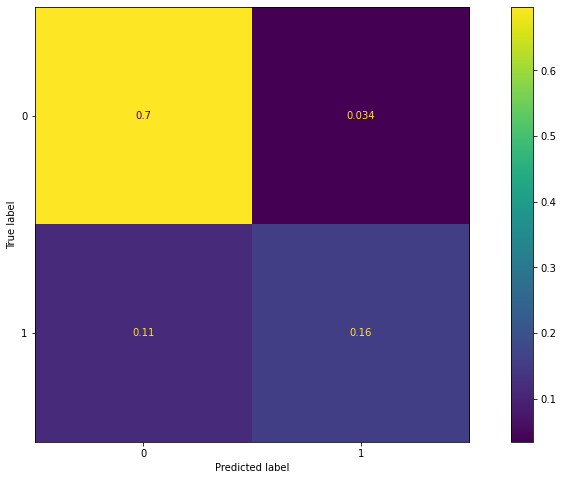

In [40]:
conf_mat = confusion_matrix(y_test, y_pred,  normalize = 'all')
fig, ax = plt.subplots(figsize = (15, 8))
ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot(ax=ax);

Try to do the same thing with lowercases.

In [41]:
X_lower = new_data.drop(['is_number', 'is_uppercase', 'is_lowercase'], axis=1)
y_lower = new_data['is_lowercase']

In [42]:
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_lower, y_lower, test_size=0.20, 
                                                                    random_state=42)

### Random Forest

In [43]:
random_f_low = RandomForestClassifier()
random_f_low.fit(X_train_low, y_train_low)

RandomForestClassifier()

In [44]:
y_pred_low = random_f_low.predict(X_test_low)

In [45]:
classification = pd.DataFrame(y_test)
classification['Predictions'] = y_pred_low
classification[:10]

,is_uppercase,Predictions
15790,0,1
94811,0,0
102587,1,0
20204,1,0
67102,0,1
25915,0,0
52376,0,0
78957,0,0
40500,0,0
111181,1,0


In [46]:
accuracy_score(y_test, y_pred_low)

0.6074790457769181

In [47]:
evaluate_model(y_test, y_pred_low)

Model F1: [0.75 0.05]
Model Precision: [0.7  0.07]
Model Recall: [0.82 0.04]


## KNN

In [48]:
knn_fit_low = KNeighborsClassifier(n_neighbors=5)
knn_fit_low.fit(X_train_low, y_train_low)

KNeighborsClassifier()

In [49]:
y_pred_low = knn_fit_low.predict(X_test_low)

In [50]:
accuracy_score(y_test, y_pred_low)

0.5967332903503116

In [51]:
evaluate_model(y_test, y_pred_low)

Model F1: [0.74 0.13]
Model Precision: [0.7  0.16]
Model Recall: [0.78 0.11]


Try to do the same thing with numbers.


### Random Forest

In [52]:
X_num = new_data.drop(['is_number', 'is_uppercase', 'is_lowercase'], axis=1)
y_num = new_data['is_number']

In [53]:
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y_num, test_size=0.20, 
                                                                    random_state=42)

In [54]:
random_f_upper = RandomForestClassifier()
random_f_upper.fit(X_train_num, y_train_num)

RandomForestClassifier()

In [55]:
y_pred_num = random_f.predict(X_test_num)

In [56]:
accuracy_score(y_test, y_pred_num)

0.8527401676337847

In [57]:
evaluate_model(y_test, y_pred_num)

Model F1: [0.9  0.68]
Model Precision: [0.86 0.82]
Model Recall: [0.95 0.58]
